In [2]:
import numpy as np
import matplotlib.pyplot as plt

1. Let's say we want to compute $\cot(0.0015)$ as accurately as possible using the following table by a) interpolating for $\cot(𝑥)$,  b) by interpolating for $\cos(𝑥)$ and $\sin(𝑥)$ and using them to calculate $\cot(𝑥)$. 
Also, estimate the error in b) and explain the difference in a) and b).

By interpolating for cot(x) we obtain: cot(0.0015) = 684.8953281249999


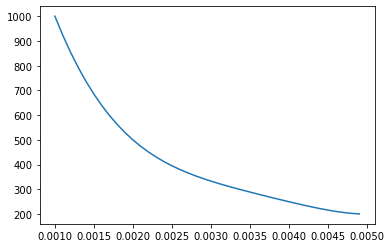

In [3]:
#I'm just gonna copy down the table in a more acommodating format
values = [0.001, 0.002, 0.003, 0.004, 0.005]
sinx = [0.001000, 0.002000, 0.003000, 0.004000, 0.005000]
cosx = [1.000000, 0.999998, 0.999996, 0.999992, 0.999988]
cotx = [1000.0, 499.999, 333.332, 249.999, 199.998]
table = [values, sinx, cosx, cotx]
#I'll assume that the question wants me to use Lagrange interpolation. If you didn't then you should have said so in the question
def buildLagrange(i,x):
    j = 0
    f = 1
    while (j <= 4):
        if(j != i):
            f = f * ((x - values[j])/(values[i] - values[j]))
        j = j+1
    return f
def interpolateCOT(x):
    i = 0
    f = 0
    while (i <= 4):
        f = f + (cotx[i] * buildLagrange(i,x))
        i = i+1
    return f
t = np.arange(0.001, 0.005, 0.0001)
plt.plot(t, interpolateCOT(t))
print("By interpolating for cot(x) we obtain: cot(0.0015) = " + str(interpolateCOT(0.0015)))


By interpolating for cos and sin and noting that cot = cos/sin, we obtain cot(0.0015) =666.6658124999997


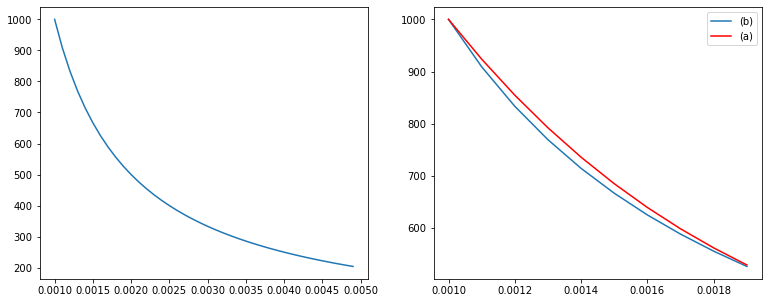

In [4]:
#we'll use our same Lagrange polynolmial builder and this time interpolate for sin and cos
def interpolateSIN(x):
    i = 0
    f = 0
    while (i <= 4):
        f = f + (sinx[i] * buildLagrange(i,x))
        i = i+1
    return f
def interpolateCOS(x):
    i = 0
    f = 0
    while (i <= 4):
        f = f + (cosx[i] * buildLagrange(i,x))
        i = i+1
    return f
def newCOT(x):
    return (interpolateCOS(x)/interpolateSIN(x))

t = np.arange(0.001, 0.002, 0.0001)
s = np.arange(0.001, 0.005, 0.0001)

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(s, newCOT(s))
plt.subplot(132)
plt.plot(t, newCOT(t), label="(b)")
plt.plot(t, interpolateCOT(t), 'r', label="(a)")
plt.legend()
print("By interpolating for cos and sin and noting that cot = cos/sin, we obtain cot(0.0015) =" + str(newCOT(0.0015)))


as reference, numerical python computes cot(0.0015) = 666.6661666665917


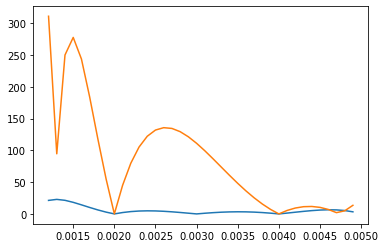

In [10]:
#We can best estimate the error using numerical python's built in sine and cosine functions
#EDIT: IGNORE THIS... IT'S NOT RIGOROUS
def cot(x):
    return np.cos(x)/np.sin(x)
def error(x):
    return np.abs(cot(x) - interpolateCOT(x))
t = np.arange(0.0012, 0.005, 0.0001)
plt.plot(t, error(t))

def error2(x):
    top = np.abs(interpolateCOS(x) - np.cos(x))
    bottom = np.abs(interpolateSIN(x) - np.sin(x))
    return top/bottom

plt.plot(t,error2(t))   

At first glance it appears that the error on the second interpolation is greater than the first, but we can't truly measure the first error since there isnt the same reference for cotangent as there is for sine and cosine, just because of how python is. We'll have to do some analysis instead:

The error in (b) is the error $\Delta(\sin / \cos)$ which, by our convention for the error on a quotient is determined by the relative errors as follows:
$$ \frac{\Delta \cot(x)}{\cot(x)} = \frac{\Delta \cos(x)}{\cos(x)} + \frac{\Delta \sin(x)}{\sin(x)}$$

The error in (b) at 0.0015 = 0.0003541665366245001


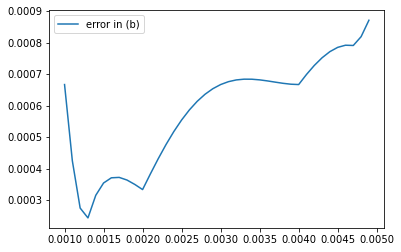

In [19]:
def relErrorCos(x):
    return (np.abs(interpolateCOS(x) - np.cos(x)))/np.cos(x)
def relErrorSin(x):
    return (np.abs(interpolateSIN(x) - np.sin(x)))/np.sin(x)
def errorInB(x):
    return newCOT(x)*(relErrorCos(x) + relErrorSin(x))

t = np.arange(0.001, 0.005, 0.0001)
plt.plot(t, errorInB(t), label='error in (b)')
plt.legend()
print("The error in (b) at 0.0015 = " + str(errorInB(0.0015)))

error in (a) (at x = 0.0015) = 18.229161458408157


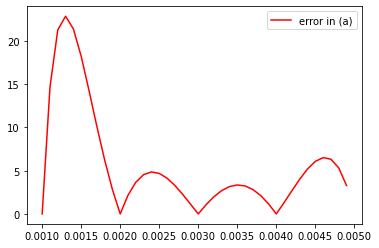

In [24]:
#now if we assume that cot = cos/sin as calculated by numerical python is the "true value"
#then the error in (a) can be expressed by:

def errorInA(x):
    return np.abs(cot(x) - interpolateCOT(x))
plt.plot(t,errorInA(t), label='error in (a)', color='r')
plt.legend()

print("error in (a) (at x = 0.0015) = " + str(errorInA(0.0015)))

One sees a huge error in (a) as oppose to that of (b), which is because the quantities used in the interpolation in the first method are many orders of magnitude larger than those used to compute in (b).